# Assignment_5
### Open Source SW project(Deep Learning)

### Import library

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

### Load the MNIST dataset
* Split data into (train_images, train_labels) and (test_images, test_labels).  


* train_images: (60000, 28, 28)
* train_labels: (60000,)
* test_images : (10000, 28, 28)
* test_labels : (10000,)   


* Above matrix shows that, there are total **60000 train images and labels** for training model. (**6000 images for single class**)
* Also, **10000 test images** and labels for testing.
* Shape of each **data(feature)** is **28x28** (pixel)


* The **range of label: 0 ... 9** (10 labels)
```python
print(max(train_labels))    # 9
print(min(train_labels))    # 0
print(max(test_labels))     # 9
print(min(test_labels))     # 0
```

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Plot first train image
* value is close to 0: dark
* value is close to 255: white

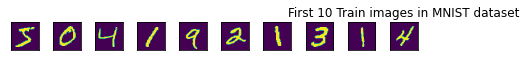


Train labels match with Train label sequentially
 [5 0 4 1 9 2 1 3 1 4]


In [3]:
def plot_train_images(title, iter_num):
    for i in range(iter_num):
        plt.subplot(1, iter_num, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(train_images[i])
    
    plt.title(title)
    plt.tight_layout()
    plt.show()
    print('\nTrain labels match with Train label sequentially\n', train_labels[:iter_num])

title = 'First 10 Train images in MNIST dataset'
plot_train_images(title, 10)

### Change data shape (60000 x 28 x 28) -> (60000 x 28 x 28 x 1)
* **Tip**: reshape에 1-이 들어가면 해당 열, 혹은 행을 자동으로 정렬해준다.

In [4]:
train_images = tf.reshape(train_images, [-1, 28, 28, 1])    # (60000, 28, 28, 1)
test_images = tf.reshape(test_images, [-1, 28, 28, 1])      # (10000, 28, 28, 1)

### Select one Convolution model below (3 example models.)

---
<center>:: Models ::</center>

|            |Layers|Convolution layer|
|------------|:----:|:---------------:|
|**Model1**|3|1|
|**Model2**|5|2|
|**Model3**|7|4|

---

In [5]:
def select_model(model_number):
    if model_number == 1:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2 
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 3

    if model_number == 2:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),     # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 4
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 5
                    
    if model_number == 3: 
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 4
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 5
                    keras.layers.Conv2D(128, (3,3), activation = 'relu'),                           # layer 6
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 7
    
    return model

In [14]:
model = select_model(1)

In [15]:
#model.summary()

sample output of ```model.summary()```
```text
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                54090     
=================================================================
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                16010     
=================================================================
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
_________________________________________________________________


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
=================================================================
Total params: 134,730
Trainable params: 134,730
Non-trainable params: 0
_________________________________________________________________
```

### Components in training step
``` Optimizer ```
``` Loss function ```
``` accuracy metrics ```

In [16]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

### Training Step
* **Training for 5 epochs**

In [17]:
model.fit(train_images, train_labels,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5612 - accuracy: 0.9412
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0834 - accuracy: 0.9751
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0684 - accuracy: 0.9793
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0634 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0554 - accuracy: 0.9839
